In [3]:
import numpy as np
from tqdm import tqdm
import anndata as ad
import sys
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import scanpy as sc
from scipy.io import savemat, loadmat
import os
import pandas as pd

In [2]:
data_folder = 'data/thomsonlab_signaling/'
large_data_folder = 'large_data/thomsonlab_signaling/'
fig_folder = 'figure/thomsonlab_signaling/'

In [4]:
cadata = ad.read_h5ad(large_data_folder + 'thomsonlab_signaling_filtered_2500_scvi_umap.h5ad')

/Users/ygong/anaconda3/envs/be206/lib/python3.11/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [2]:
import os
print(os.getcwd())

/Users/ygong/git/DSPIN-abstract


In [5]:
import os
# make dictionary
# os.mkdir("./test/test090404")
os.mkdir("test/test_large090801/figs")

In [26]:
seed = 0
num_spin = 20
num_pool = num_spin
num_repeat = 10
task_name = "thomsonlab_signaling"
save_path = "test/test_large090801/"

## Test with DSPIN Class

In [10]:
from util.dspin import DSPIN

In [35]:
# Reload the Package
from importlib import reload
import util.dspin  
reload(util.dspin)  
from util.dspin import DSPIN 

In [11]:
a = DSPIN(cadata, save_path, num_spin)

/Users/ygong/git/DSPIN-abstract/util/dspin.py:76: UserWarning: num_spin larger than 10 takes long time in Python. Please use computing clusters for larger num_spin.
  warnings.warn("num_spin larger than 10 takes long time in Python. Please use computing clusters for larger num_spin.")


In [8]:
a.gene_program_csv = 'test/test_signalling/onmf_gene_list_20.csv'

Pre-computing
Round_1


Iteration Progress: 100%|██████████| 50/50 [00:14<00:00,  3.40it/s, Reconstruction Error=7132.46]


Round_2


Iteration Progress: 100%|██████████| 50/50 [00:18<00:00,  2.63it/s, Reconstruction Error=7652.36]


Round_3


Iteration Progress: 100%|██████████| 50/50 [00:14<00:00,  3.39it/s, Reconstruction Error=7652.32]


Round_4


Iteration Progress: 100%|██████████| 50/50 [00:18<00:00,  2.74it/s, Reconstruction Error=7680.09]


Round_5


Iteration Progress: 100%|██████████| 50/50 [00:15<00:00,  3.32it/s, Reconstruction Error=7692.10]


Round_6


Iteration Progress: 100%|██████████| 50/50 [00:18<00:00,  2.78it/s, Reconstruction Error=7699.39]


Round_7


Iteration Progress: 100%|██████████| 50/50 [00:20<00:00,  2.47it/s, Reconstruction Error=7683.47]


Round_8


Iteration Progress: 100%|██████████| 50/50 [00:16<00:00,  3.04it/s, Reconstruction Error=7687.54]


Round_9


Iteration Progress: 100%|██████████| 50/50 [00:17<00:00,  2.94it/s, Reconstruction Error=7690.86]


Round_10


Iteration Progress: 100%|██████████| 50/50 [00:18<00:00,  2.66it/s, Reconstruction Error=7701.16]
/Users/ygong/anaconda3/envs/be206/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ygong/anaconda3/envs/be206/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Discretize ONMF representation into three states


100%|██████████| 20/20 [00:02<00:00,  6.75it/s]
/Users/ygong/anaconda3/envs/be206/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


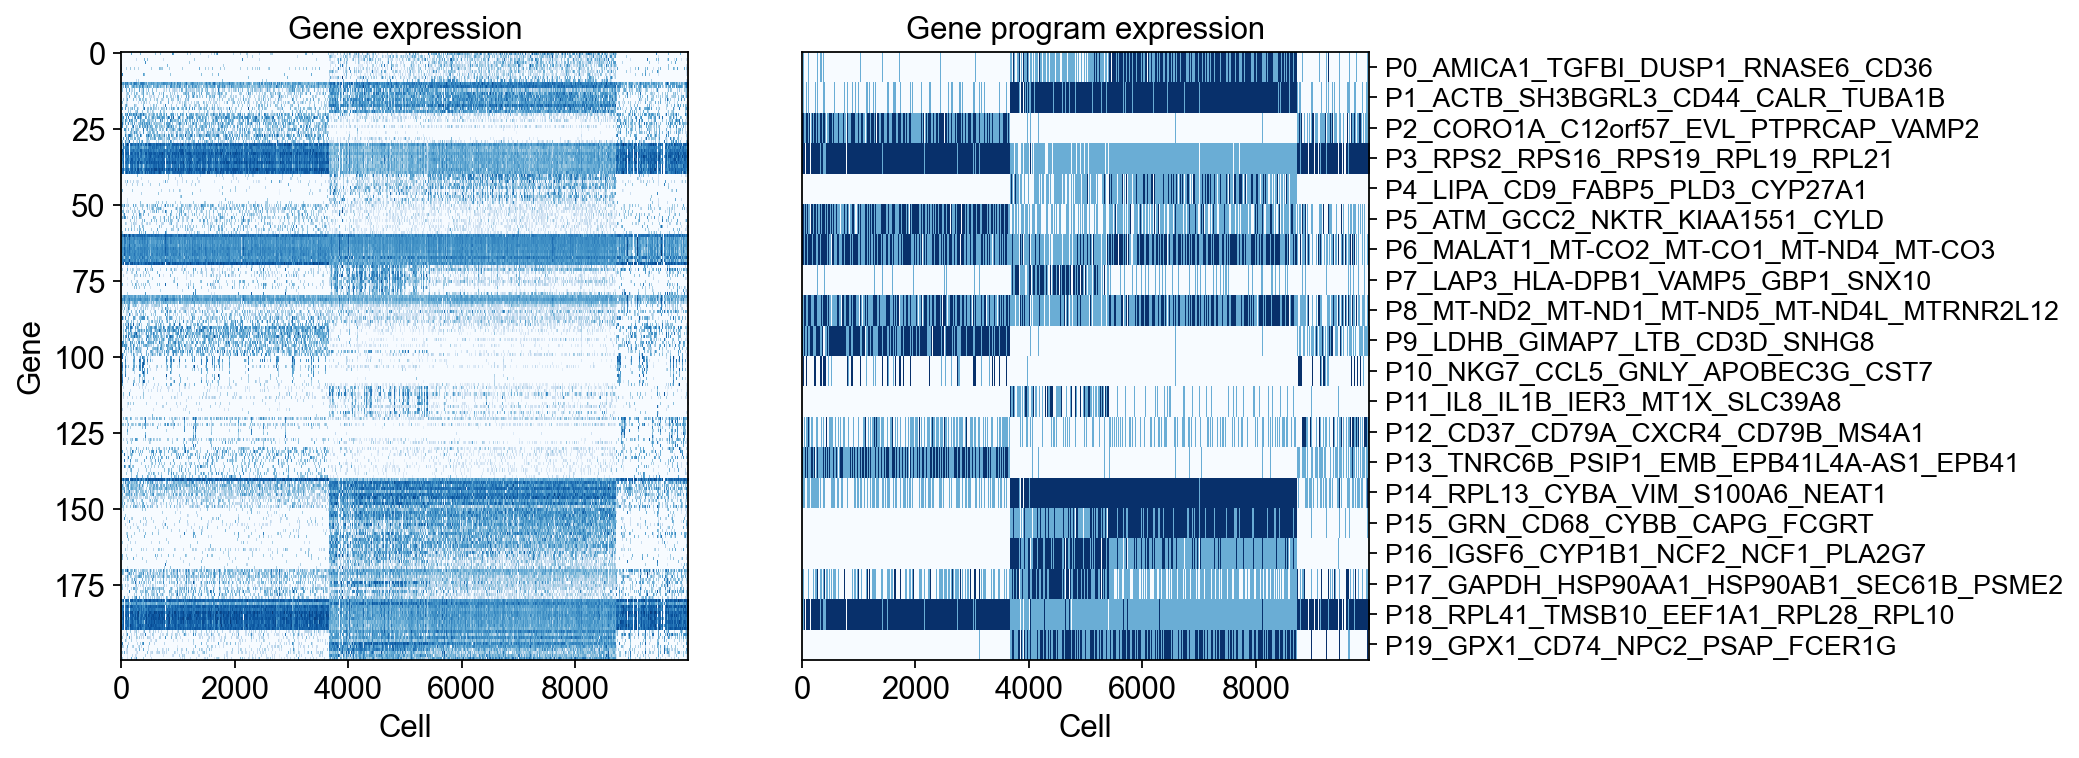

In [12]:
a.gene_program_discovery(sample_column_name= 'sample_batch')

In [51]:
example_list = ['TNFA_200ng_mL_1-COVID-1', 'IL7_50ng_mL_1-COVID-1', 'LPS_50ng_mL_1-COVID-1', 'CCL2_200ng_mL_1-COVID-1', 'CONTROL_1-COVID-1']

In [14]:
a.samplingsz = 5e6

In [15]:
a.network_infer(example_list=example_list)

Progress: 13, Network gradient: 9.367212
Progress: 20, Network gradient: 7.843157
Progress: 26, Network gradient: 6.798151
Progress: 33, Network gradient: 6.121257
Progress: 40, Network gradient: 5.514320
Progress: 46, Network gradient: 4.957665
Progress: 53, Network gradient: 4.518856
Progress: 60, Network gradient: 4.153958
Progress: 66, Network gradient: 3.803699
Progress: 73, Network gradient: 3.520614
Progress: 80, Network gradient: 3.302183
Progress: 86, Network gradient: 3.075009
Progress: 93, Network gradient: 2.871804
Progress: 100, Network gradient: 2.717961


In [14]:
a.network_infer(example_list=example_list)

Progress: 13, Network gradient: 13.826810
Progress: 20, Network gradient: 4.756778
Progress: 26, Network gradient: 4.897365
Progress: 33, Network gradient: 3.159260
Progress: 40, Network gradient: 2.798601
Progress: 46, Network gradient: 1.893549
Progress: 53, Network gradient: 1.691980
Progress: 60, Network gradient: 1.436020
Progress: 66, Network gradient: 1.213206
Progress: 73, Network gradient: 1.094372
Progress: 80, Network gradient: 0.980657
Progress: 86, Network gradient: 1.071950
Progress: 93, Network gradient: 0.813597
Progress: 100, Network gradient: 1.035872


In [35]:
a.raw_data = np.load('test/raw_data_c.npy', allow_pickle=True)

In [29]:
inner_matrix = a.raw_data.flatten()

In [31]:
inner_matrix.shape

(108,)

In [24]:
cur_j, cur_h = a.network, a.responses

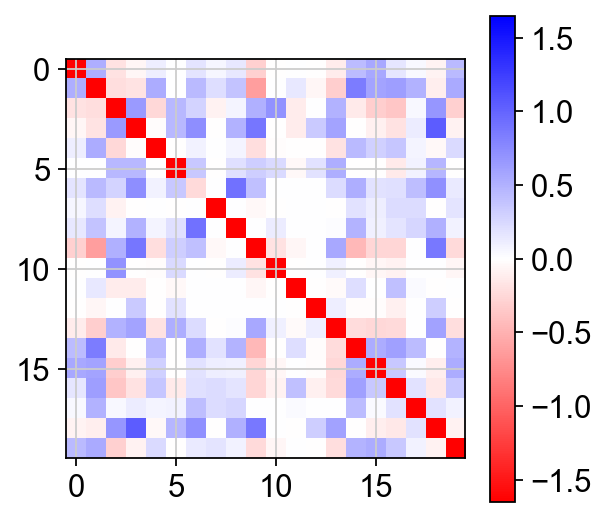

In [25]:
sc.set_figure_params(figsize=[4, 4])

j_thres = np.max(np.abs(cur_j)) / 1.5
j_thre = 1
plt.imshow(cur_j, cmap='bwr_r', vmin=- j_thres, vmax=j_thres)
plt.colorbar()

In [20]:
train_dat = {'epoch': 150, 'spin_thres': 16,
             'stepsz': 0.02, 'dropout': 0, 'counter': 1,
             'samplingsz': 5e6, 'samplingmix': 1e3, 'rec_gap': 10,
             'lam_l2h': 0.005, 'lam_l1j': 0.01}

In [21]:
a.epoch = train_dat['epoch']
a.spin_thres = train_dat['spin_thres']
a.stepsz = train_dat['stepsz']
a.dropout = train_dat['dropout']
a.counter = train_dat['counter']
a.samplingsz = train_dat['samplingsz']
a.samplingmix = train_dat['samplingmix']
a.rec_gap = train_dat['rec_gap']
a.lam_l2h = train_dat['lam_l2h']
a.lam_l1j = train_dat['lam_l1j']

### Directly Load onmf Summary

In [9]:
onmf_summary = np.load('test/test_signalling/onmf_summary_20.npy', allow_pickle=True).item()

In [10]:
a.onmf_summary = onmf_summary

In [11]:
a.matrix_balance()

## Test the Abstract DSPIN

In [18]:
from util.dspin_abstract import DSPIN

In [87]:
# Reload the Package
from importlib import reload
import util.dspin_abstract  
reload(util.dspin_abstract)  
from util.dspin_abstract import DSPIN 

In [88]:
a = DSPIN(cadata, save_path, num_spin=num_spin)

LargeDSPIN initialized.


/Users/ygong/git/DSPIN-abstract/util/dspin_abstract.py:57: UserWarning: num_spin larger than 10 takes long time in Python. Please use computing clusters for larger num_spin.
  warnings.warn("num_spin larger than 10 takes long time in Python. Please use computing clusters for larger num_spin.")


In [89]:
a.num_repeat

10

Pre-computing
Round_1


Iteration Progress: 100%|██████████| 50/50 [00:21<00:00,  2.31it/s, Reconstruction Error=7132.46]


Round_2


Iteration Progress: 100%|██████████| 50/50 [00:19<00:00,  2.63it/s, Reconstruction Error=7652.36]


Round_3


Iteration Progress: 100%|██████████| 50/50 [00:22<00:00,  2.25it/s, Reconstruction Error=7652.32]


Round_4


Iteration Progress: 100%|██████████| 50/50 [00:19<00:00,  2.54it/s, Reconstruction Error=7680.09]


Round_5


Iteration Progress: 100%|██████████| 50/50 [00:20<00:00,  2.47it/s, Reconstruction Error=7692.10]


Round_6


Iteration Progress: 100%|██████████| 50/50 [00:18<00:00,  2.69it/s, Reconstruction Error=7699.39]


Round_7


Iteration Progress: 100%|██████████| 50/50 [00:20<00:00,  2.46it/s, Reconstruction Error=7683.47]


Round_8


Iteration Progress: 100%|██████████| 50/50 [00:19<00:00,  2.57it/s, Reconstruction Error=7687.54]


Round_9


Iteration Progress: 100%|██████████| 50/50 [00:19<00:00,  2.53it/s, Reconstruction Error=7690.86]


Round_10


Iteration Progress: 100%|██████████| 50/50 [00:19<00:00,  2.56it/s, Reconstruction Error=7701.16]
/Users/ygong/anaconda3/envs/be206/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ygong/anaconda3/envs/be206/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Discretize ONMF representation into three states


100%|██████████| 20/20 [00:02<00:00,  7.20it/s]
/Users/ygong/anaconda3/envs/be206/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


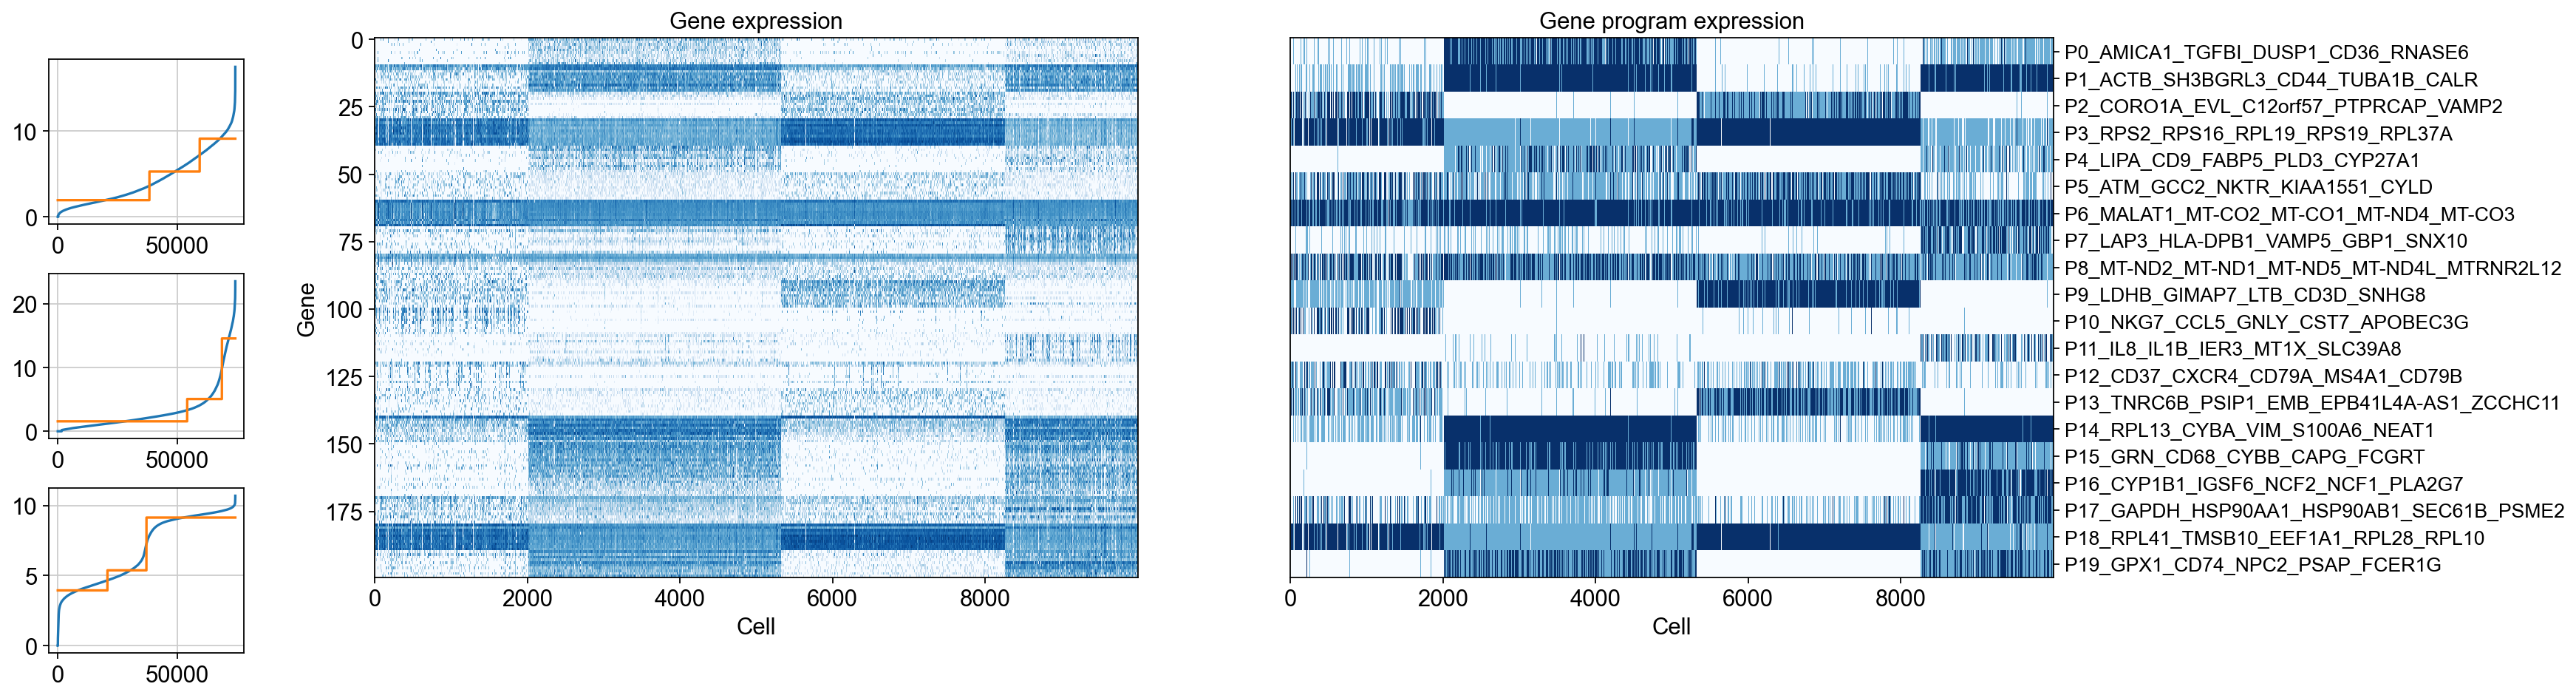

In [90]:
a.gene_program_discovery(sample_column_name= 'sample_batch')

In [65]:
a.example_list = example_list

In [91]:
a.network_infer(example_list)

I am in while loop and jj is 1
I am in while loop and jj is 2
I am in while loop and jj is 3
I am in while loop and jj is 4
I am in while loop and jj is 5
I am in while loop and jj is 6
I am in while loop and jj is 7
I am in while loop and jj is 8
I am in while loop and jj is 9
I am in while loop and jj is 10
I am in while loop and jj is 11
I am in while loop and jj is 12
I am in while loop and jj is 13
I am in while loop and jj is 14
I am in while loop and jj is 15
I am in while loop and jj is 16
I am in while loop and jj is 17
I am in while loop and jj is 18
I am in while loop and jj is 19
I am in while loop and jj is 20
Progress: 13, Network gradient: 17.518923
I am in while loop and jj is 21
I am in while loop and jj is 22
I am in while loop and jj is 23
I am in while loop and jj is 24
I am in while loop and jj is 25
I am in while loop and jj is 26
I am in while loop and jj is 27
I am in while loop and jj is 28
I am in while loop and jj is 29
I am in while loop and jj is 30
Progres

In [62]:
def common_hyperparas_setting(self, example_list=None) -> dict:
        raw_data = self.raw_data
        num_spin = self.num_spin

        if example_list:
            print('Example list is provided. Only use the samples in the list.')
            example_list_ind = [list(self.samp_list).index(samp) for samp in example_list]
            raw_data = raw_data[example_list_ind]

        print('Number of samples: ', len(raw_data))
        num_spin = raw_data[0][0].shape[0]
        num_samp = len(raw_data)
        rec_all_corr = np.zeros((num_spin, num_spin, num_samp))
        rec_all_mean = np.zeros((num_spin, num_samp))

        for ii in range(num_samp):
            rec_all_corr[:, :, ii] = raw_data[ii][0]
            rec_all_mean[:, ii] = raw_data[ii][1].flatten()
        
        cur_j = np.zeros((num_spin, num_spin))
        cur_h = np.zeros((num_spin, num_samp))
        data_dir = self.save_path + 'dspin_python/'
        task_name = data_dir + 'train_log'

        train_dat = {'cur_j': cur_j, 'cur_h': cur_h, 'task_name': task_name,
                     'rec_all_corr': rec_all_corr, 'rec_all_mean': rec_all_mean}

        dir_list = [data_dir, data_dir + 'train_log']
        for directory in dir_list:
            if not os.path.exists(directory):
                os.makedirs(directory)

        return train_dat

In [66]:
a.example_list

In [77]:
common_hyperparas_setting(a, a.example_list)

Example list is provided. Only use the samples in the list.


TypeError: 'NoneType' object is not iterable

In [75]:
a.example_list = example_list

In [76]:
a.example_list

['TNFA_200ng_mL_1-COVID-1',
 'IL7_50ng_mL_1-COVID-1',
 'LPS_50ng_mL_1-COVID-1',
 'CCL2_200ng_mL_1-COVID-1',
 'CONTROL_1-COVID-1']

In [33]:
b = DSPIN(cadata, save_path, num_spin=num_spin, num_repeat=1)

LargeDSPIN initialized.


/Users/ygong/git/DSPIN-abstract/util/dspin_abstract.py:57: UserWarning: num_spin larger than 10 takes long time in Python. Please use computing clusters for larger num_spin.
  warnings.warn("num_spin larger than 10 takes long time in Python. Please use computing clusters for larger num_spin.")


In [34]:
b.network_infer('na')

TypeError: 'NoneType' object is not subscriptable

In [35]:
a.post_processing()

In [36]:
train_dat = a.common_hyperparas_setting(a.example_list)

In [37]:
train_dat.update(a.specific_hyperparams)


In [38]:
rec_all_corr = train_dat['rec_all_corr']
rec_all_mean = train_dat['rec_all_mean']

In [39]:
a.optimized_algorithm

1

In [44]:
# Reload the Package
from importlib import reload
import util.compute  
reload(util.compute)  
from util.compute import learn_jmat_adam 

/Users/ygong/git/DSPIN-abstract/util/compute.py:632: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def compute_gradient(cur_j, cur_h, cur_state):


In [42]:
from util.compute import learn_jmat_adam

In [49]:
if a.optimized_algorithm == 1:
    cur_j, cur_h = learn_jmat_adam(rec_all_corr, rec_all_mean, train_dat)

I am in while loop and jj is 1
I am in while loop and jj is 2
I am in while loop and jj is 3
I am in while loop and jj is 4
I am in while loop and jj is 5
I am in while loop and jj is 6
I am in while loop and jj is 7
I am in while loop and jj is 8
I am in while loop and jj is 9
I am in while loop and jj is 10
I am in while loop and jj is 11
I am in while loop and jj is 12
I am in while loop and jj is 13
I am in while loop and jj is 14
I am in while loop and jj is 15
I am in while loop and jj is 16
I am in while loop and jj is 17
I am in while loop and jj is 18
I am in while loop and jj is 19
I am in while loop and jj is 20
Progress: 13, Network gradient: 145.005935
I am in while loop and jj is 21
I am in while loop and jj is 22


SystemError: CPUDispatcher(<function samp_moments at 0x14a2b5f80>) returned a result with an exception set

In [46]:
corrs = rec_all_corr
means = rec_all_mean

In [47]:
backtrack_counter = 0
step_gap = 20

num_round = corrs.shape[2]
num_spin = corrs.shape[0]

num_epoch = train_dat["epoch"]
stepsz = train_dat["stepsz"]
counter = train_dat["counter"]
task_name = train_dat["task_name"]
samplingsz_raw = train_dat["samplingsz"]
samplingmix = train_dat["samplingmix"]
rec_gap = train_dat["rec_gap"]
spin_thres = train_dat["spin_thres"]
samplingsz_step = samplingsz_raw / num_epoch * 2

list_step = np.arange(num_epoch, 0, -rec_gap)[::-1]

In [48]:
list_step

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150])

### Verification the Correctness of ONMF Representation

In [ ]:
from util.plotting import onmf_gene_program_info

num_gene_show = 20
features = a.onmf_summary.components_
gene_name = cadata.var_names

onmf_gene_program_info(features, gene_name, num_gene_show, fig_folder)

#### Visualization of gene program decomposition

In [39]:
from importlib import reload
import util.compute
reload(util.compute)   

<module 'util.compute' from '/Users/ygong/git/DSPIN-abstract/util/compute.py'>

In [10]:
a.compute_onmf_rep_ori()

In [11]:
a.discretize()

100%|██████████| 20/20 [00:03<00:00,  6.56it/s]


In [12]:
a.onmf_rep_tri

array([[0. , 0. , 0. , ..., 1. , 0. , 0.5],
       [1. , 0. , 0. , ..., 1. , 0. , 0.5],
       [0.5, 0.5, 0. , ..., 1. , 0. , 0. ],
       ...,
       [0. , 0.5, 0.5, ..., 0.5, 0. , 0. ],
       [0. , 0.5, 0. , ..., 0.5, 0.5, 0. ],
       [0. , 0.5, 0.5, ..., 0.5, 0. , 0. ]])

In [13]:
onmf_rep_tri = a.onmf_rep_tri

In [14]:
from util.plotting import temporary_spin_name, gene_program_decomposition

In [47]:
spin_name = temporary_spin_name('test/test_signalling/onmf_gene_list_20.csv')

In [17]:
fig_folder = '/Users/ygong/git/DSPIN-abstract/test/test_signalling/figs'

In [19]:
gene_program_decomposition(a.onmf_summary, num_spin, spin_name, a.gene_matrix_large, onmf_rep_tri, fig_folder)

TypeError: tuple indices must be integers or slices, not tuple

In [15]:
gene_matrix = a.gene_matrix_large

In [23]:
std = a.matrix_std

In [4]:
import networkx as nx
import matplotlib.patheffects as patheffects

def plot_jmat_network(G, j_mat, ax, nodesz=1, linewz=1, node_color='k', pos=None): 
    
    self_loops = [(u, v) for u, v in G.edges() if u == v]
    G.remove_edges_from(self_loops)

    eposi= [(u, v) for (u,v,d) in G.edges(data=True) if d['weight'] > 0]
    wposi= np.array([d['weight'] for (u,v,d) in G.edges(data=True) if d['weight'] > 0])

    enega = [(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] < 0]
    wnega = np.array([d['weight'] for (u,v,d) in G.edges(data=True) if d['weight'] < 0])

    col1 = '#f0dab1'
    # nx.draw_networkx_nodes(G, pos, ax=ax, node_size=61.8 * nodesz, node_color=col1, edgecolors='None')
    nx.draw_networkx_nodes(G, pos, ax=ax, node_size=61.8 * nodesz, node_color=node_color, edgecolors='k')

    sig_fun = lambda xx : (1 / (1 + np.exp(- 5 * (xx + cc))))
    cc = np.max(np.abs(j_mat)) / 10
    # edges
    nx.draw_networkx_edges(G, pos, ax=ax, edgelist=eposi, width=linewz * wposi, 
                            edge_color='#3285CC', alpha=sig_fun(wposi))

    nx.draw_networkx_edges(G, pos, ax=ax, edgelist=enega, width=- linewz * wnega, 
                            edge_color='#E84B23', alpha=sig_fun(- wnega))

    margin = 0.2
    plt.margins(x=0.1, y=0.1)

    ax.set_axis_off()
    ax.set_aspect('equal')
    return ax 

In [48]:
gene_list = spin_name

In [49]:
gene_list

['P0_PPP1R14B_APOBEC3G_CMC1_GZMM_LYAR',
 'P1_ATM_GCC2_PPP2R5C_TNRC6B_NKTR',
 'P2_FABP5_MFSD12_HMG20B_ALAS1_CD83',
 'P3_PSME2_IRF1_STAT1_LAP3_GBP1',
 'P4_NFKBIA_C15orf48_IL8_PLAUR_KYNU',
 'P5_MALAT1_MT-CO1_MT-CO2_MT-ND4_MT-CO3',
 'P6_MT-ND2_MT-ND1_TMSB10_RPL41_EEF1A1',
 'P7_GABARAP_LGMN_ZFP36_CD163_FCGR3A',
 'P8_CYBA_S100A6_NEAT1_S100A11_CD63',
 'P9_CD37_CD79A_CXCR4_CD79B_MS4A1',
 'P10_FOS_IER2_FCN1_TGFBI_FUCA1',
 'P11_AES_LDHB_GIMAP7_LTB_C12orf57',
 'P12_ATP6AP2_FCGRT_APLP2_ACP5_NCF2',
 'P13_SNHG8_GIMAP1_PIK3IP1_KLF2_CCR7',
 'P14_REL_BASP1_PPA1_MARCKS_HSPD1',
 'P15_HBB_HBA2_HBA1_SNCA_SLC25A37',
 'P16_NKG7_GNLY_CCL5_CST7_GZMA',
 'P17_RPL28_RPS2_RPS28_RPL11_RPS15',
 'P18_MT2A_MT1X_MT1F_MT1G_MT1E',
 'P19_CCNG1_AQP3_TC2N_CCDC104_TSHZ2']

In [50]:
cur_j = a.network

In [53]:
j_mat = a.responses

In [2]:
def format_label(label):
    parts = label.split('_')
    parts[1] = parts[1] + '\n'
    parts[3] = parts[3] + '\n'
    return '_'.join(parts)

In [3]:
label = 'P0_PPP1R14B_APOBEC3G_CMC1_GZMM_LYAR'
print(format_label(label))

P0_PPP1R14B
_APOBEC3G_CMC1
_GZMM_LYAR


In [57]:
def adjust_label_position(pos, offset=0.1):
    """Move labels radially outward from the center by a given offset."""
    adjusted_pos = {}
    for node, coordinates in pos.items():
        theta = np.arctan2(coordinates[1], coordinates[0])
        radius = np.sqrt(coordinates[0]**2 + coordinates[1]**2)
        adjusted_pos[node] = (coordinates[0] + np.cos(theta)*offset, coordinates[1] + np.sin(theta)*offset)
    return adjusted_pos

In [5]:
sc.set_figure_params(figsize=[18, 14])

nodesz = 2
linewz = 3
node_color = ['#f0dab1'] * num_spin
node_label = np.array([format_label(label) for label in gene_list])


fig, grid = sc.pl._tools._panel_grid(0.1, 0.1, ncols=2, num_panels=2)

cur_j_filt = cur_j.copy()
cur_j_filt[np.abs(cur_j_filt) < np.percentile(np.abs(cur_j_filt), 40)] = 0
G = nx.from_numpy_array(cur_j_filt)
pos = nx.circular_layout(G)

ax = plt.subplot(grid[1])
ax = plot_jmat_network(G, cur_j_filt, ax, nodesz=nodesz, linewz=linewz, node_color=node_color, pos=pos)

path_effect = [patheffects.withStroke(linewidth=4, foreground='w')]

adjusted_positions = adjust_label_position(pos, 0.2)
for ii in range(num_spin):
    x, y = adjusted_positions[ii]
    text = plt.text(x, y, node_label[ii], fontsize=13, color='k', ha='center', va='center')
    text.set_path_effects(path_effect)
ax.set_title('D-SPIN')


NameError: name 'sc' is not defined